**Sklearn Datasets**
* Sklearn provides popular datasets through fetch_mldata function.
* The returned dictionary contains four fields:
* COL_NAMES:gives list of column names
* data: is an array of the data values excluding target attribute
* target: is an array of target attribute
* DESCR: describes the dataset

In [46]:
from sklearn.datasets import fetch_mldata
mnist=fetch_mldata("MNIST original")
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [47]:
X,Y=mnist["data"],mnist["target"]
print(X.shape)
print(Y.shape)

(70000, 784)
(70000,)


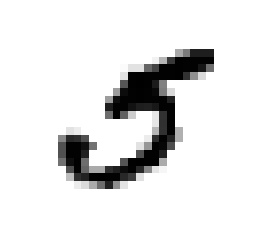

5.0


In [48]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
sample_digit=X[36000]
sample_digit_image=sample_digit.reshape(28,28)
plt.imshow(sample_digit_image,cmap=matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()
print(y[36000])

In [49]:
#This set is already divided into train and test sets.the first 60000 rows correspond to train set
#The next 10000 rows correspond to test set
X_train=X[:60000]
X_test=X[60000:]
Y_train=Y[:60000]
Y_test=Y[60000:]

In [50]:
import numpy as np
#Shuffling the data to avoid having consecutive similar class labels as this affects the performance for few models
shuffle_index=np.random.permutation(60000)
X_train=X_train[shuffle_index]
Y_train=Y_train[shuffle_index]

In [51]:
#Collecting target attribute for a dichotomy classifier for identifying if a number is 5
Y_train_5=(Y_train==5)
Y_test_5=(Y_test==5)

In [59]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,Y_train_5)
sgd_clf.predict([sample_digit])

array([ True], dtype=bool)

In [63]:
from sklearn.model_selection import cross_val_score
#accuracy measures the percentage of times you got the accurate prediction
cross_val_score(sgd_clf,X_train,Y_train_5,cv=5,scoring="accuracy")

array([ 0.96591951,  0.95375   ,  0.94383333,  0.95508333,  0.97133094])

In [72]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def __init(self):
        return self
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [74]:
never5Classifer=Never5Classifier()
cross_val_score(never5Classifer,X_train,Y_train_5,cv=5,scoring="accuracy")

array([ 0.90558333,  0.9095    ,  0.91225   ,  0.91266667,  0.90825   ])

** cross_val_predict **
* This provides predictions for each fold using a model trained against the remaining folds
* Difference b/w this one and score is that the later one only gives the scores based on a scoring criteria

** confusion matrix **
* This compares the results with the predictions and provides the number of true negatives,false negatives,false positives and true positives

** precision score and recall score **
* precision score tells us how accurate is each prediction more precision score implies less false positives
* recall score tells us how many are correctly predicted out of all positvies.

**F1 Score **
* harmonic mean of precision score and recall score to give a single metirc for scoring evaluation.

In [77]:
from sklearn.model_selection import cross_val_predict
Y_train_pred_5=cross_val_predict(sgd_clf,X_train,Y_train_5,cv=5)

In [78]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train_5,Y_train_pred)

array([[53045,  1534],
       [  987,  4434]])

In [83]:
from sklearn.metrics import precision_score,recall_score,f1_score
print(precision_score(Y_train_5,Y_train_pred))
print(recall_score(Y_train_5,Y_train_pred))
print(f1_score(Y_train_5,Y_train_pred))

0.742962466488
0.817930271168
0.77864606199


In [86]:
y_scores=cross_val_predict(sgd_clf,X_train,Y_train_5,cv=5,method="decision_function")
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds=precision_recall_curve(Y_train_5,y_scores)

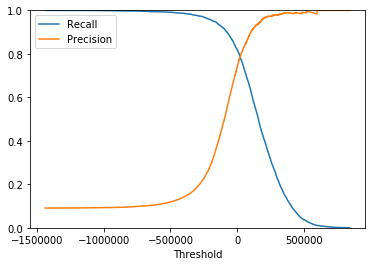

In [92]:
def plot_precision_recall_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,recalls[:-1],label="Recall")
    plt.plot(thresholds,precisions[:-1],label="Precision")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])
    
plot_precision_recall_threshold(precisions,recalls,thresholds)

Text(0,0.5,u'recall')

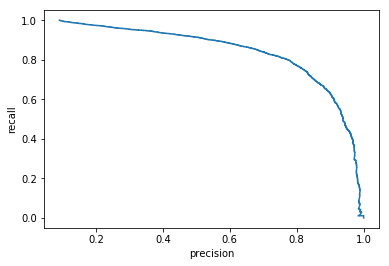

In [95]:
plt.plot(precisions,recalls)
plt.xlabel("precision")
plt.ylabel("recall")

In [98]:
y_pred_90=(y_scores>70000)
print(precision_score(Y_train_5,y_pred_90),recall_score(Y_train_5,y_pred_90))

(0.85763332570382234, 0.69120088544548974)


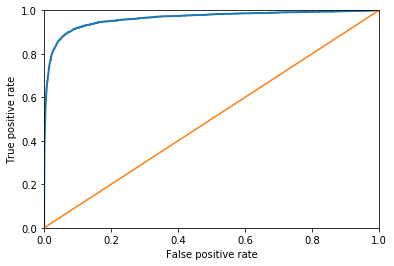

In [106]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(Y_train_5,y_scores)

def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1]) #plotting line which shows linear proportion between fpr and tpr
    plt.axis([0,1,0,1])#axis values xmin.xmax,ymin.ymax
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    
plot_roc_curve(fpr,tpr)
plt.show()

In [109]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_train_5,y_scores)

0.96288190221662151

0.99310302169453868

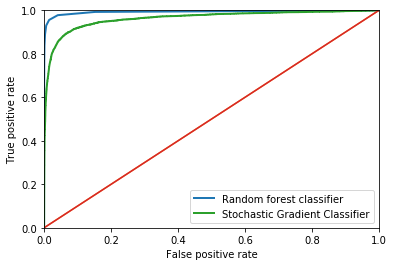

In [114]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest=cross_val_predict(forest_clf,X_train,Y_train_5,cv=5,method="predict_proba")
y_scores_forest=y_probas_forest[:,1]# scores=probs of positive class
fpr_forest,tpr_forest,thresholds_forest=roc_curve(Y_train_5,y_scores_forest)
plot_roc_curve(fpr_forest,tpr_forest,label="Random forest classifier")
plot_roc_curve(fpr,tpr,label="Stochastic Gradient Classifier")
plt.legend(loc="bottom right")
roc_auc_score(Y_train_5,y_scores_forest)

** Some algorithms handle multiclass classification. Examples are Naive Baiyes and Random Forest Classifiers.**
* But the other algoritms which are strict binary classifiers adapt two strategies for multi-class classification

** One Versus All Srategy **
* In this strategy Each class gets a binary classifier and these are trained on entire data
* For prediction decision score across all classifiers is compared and the maximum score is selected.

** One Versus One Strategy **
* In this strategy instead of each class having a binary classifier(True/False) we have pair wise classifiers
* For instance if we have to classify 1,2,3 then we will have 1 or 2, 2 or 3,1 or 3 classifiers.
* so there will be N(N-1)/2 classifiers.
* Contrast to OVA this has the advantage of training on lesser data.

**OVA is most preferred choice and OVO is used for SVM***

In [122]:
#Training Stochastic gradient descent;Sklearn uses OVO by default for every classifier(except OVA for SVM)
sgd_clf.fit(X_train,Y_train)
print("the prediction for image 5 is ",sgd_clf.predict([sample_digit]))
some_digit_scores=sgd_clf.decision_function([sample_digit])
print("the scores corresponding to classifiers are",some_digit_scores)
print("the different classes in above algo are:",sgd_clf.classes_)

('the prediction for image 5 is ', array([ 5.]))
('the scores corresponding to classifiers are', array([[-374969.00663845, -450638.22061586, -454481.79048167,
        -161800.15207548, -300444.55570426,  305277.53332912,
        -872167.19370191, -314821.19989669, -449350.58945883,
        -731829.92487942]]))
('the different classes in above algo are:', array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]))


** To enforce OVA or OVO and override default setting in sklearn we can use respective class and pass the model as argument **
* For instance we can enforce OVO strategy on sgd_clf above by using OneVsOneClassifier class

In [121]:
from sklearn.multiclass import OneVsOneClassifier
ovo_sgd = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_sgd.fit(X_train,Y_train)
print("the prediction for image 5 is ",ovo_sgd.predict([sample_digit]))
print("the length of the estimators for above algo is",len(ovo_sgd.estimators_))

('the prediction for image 5 is ', array([ 5.]))
('the length of the estimators for above algo is', 45)


In [124]:
#Random forest for Multiclasses
forest_clf.fit(X_train,Y_train)
print("the prediction for image 5 is ",forest_clf.predict([sample_digit]))
print("the probabilities for different classes of target variable are",forest_clf.predict_proba([sample_digit]))

('the prediction for image 5 is ', array([ 5.]))
('the probabilities for different classes of target variable are', array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]]))


In [130]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
X_train_scaled=std_scaler.fit_transform(X_train.astype(np.float64))
print("The cross validation scores for sgd on unscaled data",cross_val_score(sgd_clf,X_train,Y_train,cv=3,scoring="accuracy"))
print("The cross validation scores for sgd on scaled data",cross_val_score(sgd_clf,X_train_scaled,Y_train,cv=3,scoring="accuracy"))

('The cross validation scores for sgd on unscaled data', array([ 0.84263147,  0.84349217,  0.84257639]))
('The cross validation scores for sgd on scaled data', array([ 0.90741852,  0.91179559,  0.90923639]))


** The above scores validate the importance of scaling training data to achieve better results **

[[5735    3   23    9   11   42   49    8   41    2]
 [   1 6463   44   30    6   42    8   10  127   11]
 [  55   37 5334   97   77   24  101   58  161   14]
 [  46   41  139 5331    3  248   35   50  139   99]
 [  20   26   40    9 5350   10   57   36   91  203]
 [  76   40   37  168   80 4596  107   31  192   94]
 [  32   25   45    2   33   96 5632    7   46    0]
 [  24   24   72   31   46   10    4 5799   17  238]
 [  47  146   77  140   17  155   55   27 5046  141]
 [  43   34   26   86  159   42    3  197   76 5283]]


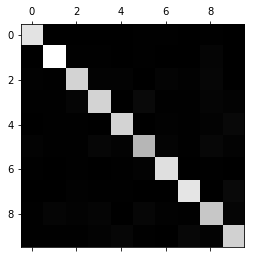

In [132]:
y_train_scaled_pred=cross_val_predict(sgd_clf,X_train_scaled,Y_train,cv=3)
cnf_mat=confusion_matrix(Y_train,y_train_scaled_pred)
print(cnf_mat)
plt.matshow(cnf_mat,cmap=plt.cm.gray)#plotting the gray scale lighter shade along diagnol shows more true predictions.
plt.show()

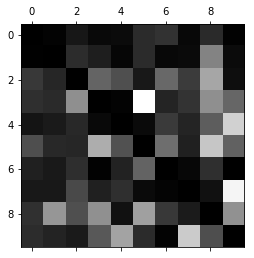

In [133]:
#The above might be biased due to fewer instances of each class;therefore normalizing the matrix
row_sums=cnf_mat.sum(axis=1,keepdims=True)
norm_cnf_mat=cnf_mat/row_sums
np.fill_diagonal(cnf_mat,0)# To ignore correct and concentrate on wrong predictions
plt.matshow(cnf_mat,cmap=plt.cm.gray)
plt.show()

** Multilabel Classification **
* Classification gives a value for each label;
* For instance for 5 (is greater than 5) label would be a False and (is an odd number) label would be True

In [134]:
y_train_large= (Y_train >5)
y_train_odd= (Y_train %2==1)
y_multilabel=np.c_[y_train_large,y_train_odd]

from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)
print("the prediction for image 5 is ",knn_clf.predict([sample_digit]))
#Evaluation:
y_train_knn_pred=cross_val_predict(knn_clf,X_train,y_multilabel,cv=3)
f1_score=f1_score(y_multilabel,y_train_knn_pred,average="macro")

('the prediction for image 5 is ', array([[False,  True]], dtype=bool))
